In [24]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import ra_dec2_hpid, hpid2_ra_dec
from rubin_sim.scheduler.utils import EuclidOverlapFootprint

In [2]:
# generate the latest footprint
nside = 64
fpg = EuclidOverlapFootprint(nside=nside)
maps_arr, labels = fpg.return_maps()

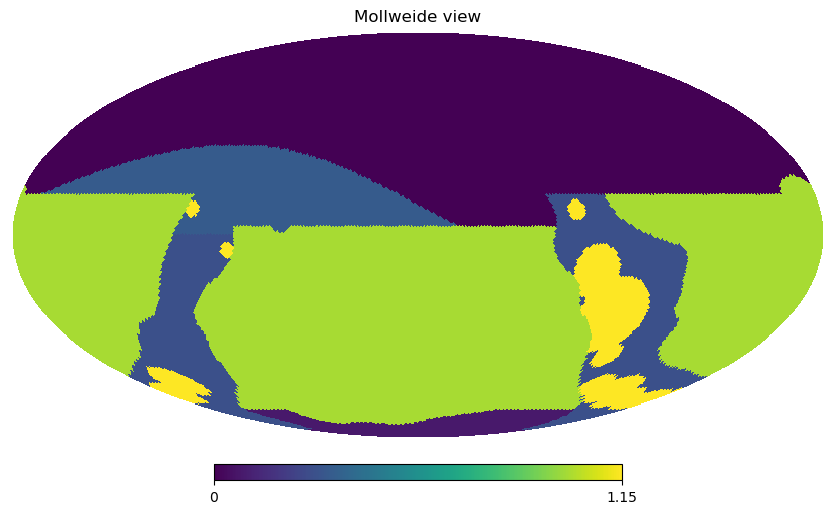

In [3]:
# look at the r-band
hp.mollview(maps_arr['r'])

0 
1 LMC_SMC
2 bulgy
3 dusty_plane
4 euclid_overlap
5 lowdust
6 nes
7 scp
8 virgo


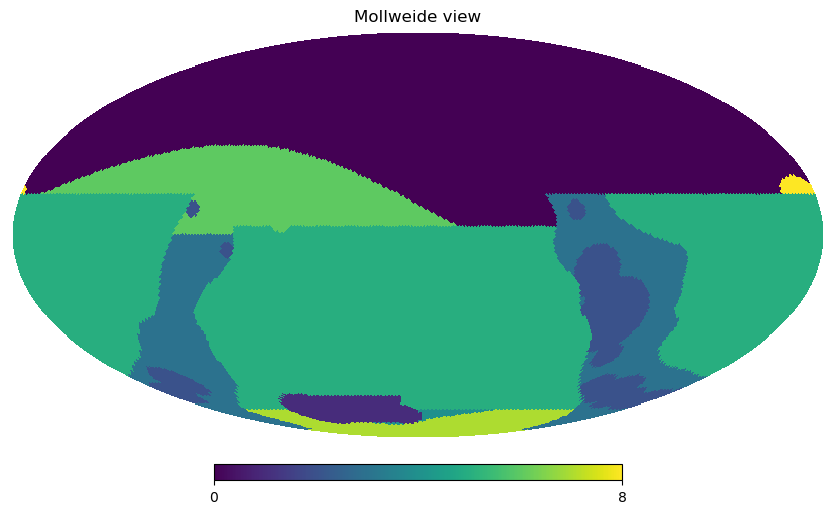

In [4]:
# Look at the labels
label_int = np.zeros(hp.nside2npix(nside))
for i,label in enumerate(np.unique(labels)):
    indx = np.where(labels == label)[0]
    label_int[indx] = i
    print(i, label)
hp.mollview(label_int)


In [5]:
# See if an RA, dec is in the footprint
ra = 90
dec = -15
# Find the healpixel of the ra,dec
hpid = ra_dec2_hpid(nside,ra, dec)

In [6]:
for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.32
g 0.4
r 1.0
i 1.0
z 0.9
y 0.9


In [7]:
# Check a spot in the NES
ra = 90
dec = 15
hpid = ra_dec2_hpid(nside,ra, dec)

for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.0
g 0.23
r 0.33
i 0.33
z 0.23
y 0.0


In [8]:
# So that spot will get observed in griz, but not in u or y.

In [9]:
# A spot north
ra = 90
dec = 45
hpid = ra_dec2_hpid(nside,ra, dec)

for filtername in 'ugrizy':
    print(filtername, maps_arr[filtername][hpid])

u 0.0
g 0.0
r 0.0
i 0.0
z 0.0
y 0.0


In [10]:
# if we want to know if something is in WFD
np.unique(labels)

array(['', 'LMC_SMC', 'bulgy', 'dusty_plane', 'euclid_overlap', 'lowdust',
       'nes', 'scp', 'virgo'], dtype='<U20')

In [11]:
# Parts of the sky one could call WFD
wfd_pix = np.where((labels == 'lowdust') | (labels == "virgo") |
                   (labels == "LMC_SMC")| (labels == "euclid_overlap"))[0]

In [12]:
hpid = ra_dec2_hpid(nside,90, 45)

hpid in wfd_pix

False

In [13]:
hpid = ra_dec2_hpid(nside,0, -15)
hpid in wfd_pix

True

In [14]:
# How much area in the WFD?

# Parts of the sky one could call WFD
wfd_pix = np.where((labels == 'lowdust') | (labels == "virgo") |
                   (labels == "LMC_SMC")| (labels == "euclid_overlap"))[0]

hp_size = hp.nside2pixarea(nside, degrees=True)

print("area=", np.size(wfd_pix)*hp_size, ' sq deg')

area= 18138.814260303738  sq deg


In [15]:
# But maybe you don't want to count the LMC and virgo

# Parts of the sky one could call WFD
wfd_pix = np.where((labels == 'lowdust') | (labels == "euclid_overlap"))[0]

hp_size = hp.nside2pixarea(nside, degrees=True)

print("area=", np.size(wfd_pix)*hp_size, ' sq deg')

area= 17547.112240429862  sq deg


In [20]:
# Loop over all the healpixels. If healpix borders a zero, remember it
border_hpids = []
for i,val in enumerate(maps_arr['r']):
    if val > 0:
        neigh = hp.get_all_neighbours(nside, i)
        if 0 in maps_arr['r'][neigh]:
            border_hpids.append(i)

[11189,
 11190,
 11191,
 11192,
 11193,
 11194,
 11195,
 11196,
 11197,
 11198,
 11199,
 11200,
 11201,
 11202,
 11203,
 11204,
 11205,
 11206,
 11207,
 11208,
 11209,
 11210,
 11441,
 11442,
 11443,
 11444,
 11445,
 11446,
 11447,
 11448,
 11449,
 11450,
 11451,
 11452,
 11453,
 11454,
 11455,
 11456,
 11457,
 11458,
 11459,
 11460,
 11461,
 11462,
 11463,
 11464,
 11465,
 11466,
 11467,
 11468,
 11469,
 11470,
 11471,
 11693,
 11694,
 11695,
 11696,
 11697,
 11698,
 11699,
 11700,
 11723,
 11724,
 11725,
 11726,
 11727,
 11728,
 11729,
 11730,
 11947,
 11948,
 11949,
 11950,
 11951,
 11952,
 11984,
 11985,
 11986,
 11987,
 11988,
 11989,
 12200,
 12201,
 12202,
 12203,
 12204,
 12243,
 12244,
 12245,
 12246,
 12247,
 12454,
 12455,
 12456,
 12457,
 12458,
 12502,
 12503,
 12504,
 12505,
 12506,
 12707,
 12708,
 12709,
 12710,
 12711,
 12760,
 12761,
 12762,
 12763,
 12764,
 12962,
 12963,
 12964,
 12965,
 13019,
 13020,
 13021,
 13022,
 13215,
 13216,
 13217,
 13218,
 13277,
 13278,


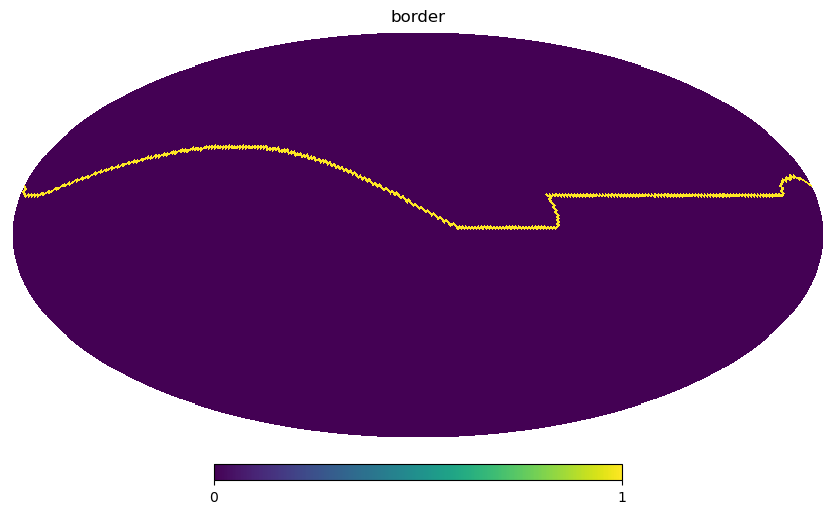

In [28]:
border_map = maps_arr['r']*0
border_map[border_hpids] += 1
hp.mollview(border_map, title='border')

In [27]:
# Print the RA,dec of the border pixles
hpid2_ra_dec(nside,border_hpids)

(array([ 75.234375,  76.640625,  78.046875,  79.453125,  80.859375,
         82.265625,  83.671875,  85.078125,  86.484375,  87.890625,
         89.296875,  90.703125,  92.109375,  93.515625,  94.921875,
         96.328125,  97.734375,  99.140625, 100.546875, 101.953125,
        103.359375, 104.765625,  68.90625 ,  70.3125  ,  71.71875 ,
         73.125   ,  74.53125 ,  75.9375  ,  77.34375 ,  78.75    ,
         80.15625 ,  81.5625  ,  82.96875 ,  84.375   ,  85.78125 ,
         87.1875  ,  88.59375 ,  90.      ,  91.40625 ,  92.8125  ,
         94.21875 ,  95.625   ,  97.03125 ,  98.4375  ,  99.84375 ,
        101.25    , 102.65625 , 104.0625  , 105.46875 , 106.875   ,
        108.28125 , 109.6875  , 111.09375 ,  63.984375,  65.390625,
         66.796875,  68.203125,  69.609375,  71.015625,  72.421875,
         73.828125, 106.171875, 107.578125, 108.984375, 110.390625,
        111.796875, 113.203125, 114.609375, 116.015625,  60.46875 ,
         61.875   ,  63.28125 ,  64.6875  ,  66.